## Predicting Bigg Boss Kannada (ಬಿಗ್ ಬಾಸ್ ಕನ್ನಡ) Season 8 Winner

## Using Python scikit learn https://satya-python.blogspot.com/

### Importing Required Python Libraries

In [107]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

### Import dataset

In [108]:
bigg_boss = pd.read_csv('/kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada/Bigg_Boss_India.csv', encoding = "ISO-8859-1")
nRow, nCol = bigg_boss.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 649 rows and 24 columns


## Exploratory Data Analysis (EDA)

In [109]:
bigg_boss.head(5)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,03-Nov-06,NaN,10.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0,0.0
1,Hindi,1,Anupama Verma,Model,Female,03-Nov-06,NaN,5.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,03-Nov-06,NaN,4.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,03-Nov-06,NaN,1.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
4,Hindi,1,Carol Gracias,Model,Female,03-Nov-06,26-Jan-07,12.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,6.0,0.0,0.0,NaN,1.0,0.0


In [110]:
bigg_boss.tail(10).T

,639,640,641,642,643,644,645,646,647,648
Language,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam
Season Number,2,2,2,2,2,2,2,2,2,2
Name,Sujo Mathew,Suresh Krishnan,Thesni Khan,Veena Nair,Daya Ashwathy/Achu,Jazla Madassery,Pavan Gino Thomas,Sooraj,Abhirami Suresh,Amrutha Suresh
Profession,Model,Film Director,Actress,Actress,Social Media Star,Activist,Model,Radio Jockey,Actress,Singer
Gender,Male,Male,Female,Female,Female,Female,Male,Male,Female,Female
Entry Date,05-Jan-20,05-Jan-20,05-Jan-20,05-Jan-20,26-Jan-20,26-Jan-20,NaN,NaN,NaN,NaN
Elimination Date,NaN,26-Jan-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Week Number,NaN,3,4,NaN,NaN,8,NaN,8,NaN,NaN
Wild Card,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes
Season Length,105,105,105,105,105,105,105,105,105,105


In [111]:
bigg_boss.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
60,Hindi,4,Dolly Bindra,Actress,Female,NaN,08-Jan-11,14.0,Yes,96,16,03-Oct-10,08-Jan-11,Salman Khan,NaN,0,Colors,4.95,4.0,0.0,1.0,NaN,1.0,0.0
185,Hindi,11,Priyank Sharma,Model,Male,01-Oct-17,NaN,13.0,No,106,19,01-Oct-17,14-Jan-18,Salman Khan,NaN,0,Colors,7.64,8.0,1.0,0.0,NaN,0.0,0.0
169,Hindi,10,Rahul Dev,Actor,Male,16-Oct-16,NaN,9.0,No,105,18,16-Oct-16,28-Jan-17,Salman Khan,NaN,0,Colors,3.54,5.0,0.0,0.0,NaN,0.0,0.0
446,Telugu,3,Siva Jyothi,TV Anchor,Female,21-Jul-19,27-Oct-19,14.0,No,105,17,21-Jul-19,03-Nov-19,Nagarjuna,Ramya Krishnan,0,Star Maa,NaN,4.0,0.0,1.0,NaN,0.0,0.0
254,Hindi,14,Kashmera Shah,Actress,Female,NaN,NaN,11.0,Yes,143,22,03-Oct-20,21-Feb-21,Salman Khan,NaN,0,Colors,NaN,2.0,0.0,0.0,NaN,0.0,0.0
284,Kannada,2,Shakeela,Actress,Female,29-Jun-14,NaN,3.0,No,98,15,29-Jun-14,5-Oct-14,Sudeep,NaN,0,Suvarna,NaN,2.0,0.0,0.0,NaN,0.0,0.0
28,Hindi,2,Zulfi Syed,Model,Male,17-Aug-08,22-Nov-08,14.0,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,NaN,0,Colors,2.89,3.0,0.0,0.0,NaN,1.0,0.0
645,Malayalam,2,Pavan Gino Thomas,Model,Male,NaN,NaN,NaN,Yes,105,23,05-Jan-20,19-Apr-20,Mohanlal,NaN,0,Asianet,11.03,0.0,0.0,0.0,NaN,0.0,0.0
462,Telugu,4,Mehaboob Dil Se,Social Media Star,Male,06-Sep-20,15-Nov-20,10.0,No,105,19,06-Sep-20,20-Dec-20,Nagarjuna,Samantha Akkineni,0,Star Maa,NaN,5.0,0.0,1.0,5.0,0.0,0.0
458,Telugu,4,Divi Vadthaya,Model,Female,06-Sep-20,25-Oct-20,7.0,No,105,19,06-Sep-20,20-Dec-20,Nagarjuna,Samantha Akkineni,0,Star Maa,NaN,3.0,0.0,0.0,5.0,0.0,0.0


In [112]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 24 columns):
Language                              649 non-null object
Season Number                         649 non-null int64
Name                                  649 non-null object
Profession                            648 non-null object
Gender                                643 non-null object
Entry Date                            550 non-null object
Elimination Date                      133 non-null object
Elimination Week Number               533 non-null float64
Wild Card                             649 non-null object
Season Length                         649 non-null int64
Number of Housemates                  649 non-null int64
Season Start Date                     649 non-null object
Season End Date                       632 non-null object
Host Name                             649 non-null object
Guest Host Name                       73 non-null object
Prize Money (INR)           

In [113]:
bigg_boss.describe()

,Season Number,Elimination Week Number,Season Length,Number of Housemates,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
count,649.000000,533.000000,649.000000,649.000000,394.000000,619.000000,615.000000,601.000000,86.000000,633.000000,633.000000
mean,4.989214,9.270169,103.570108,18.269646,6.230635,4.067851,0.102439,0.539101,6.593023,0.241706,0.053712
std,3.814957,4.845565,12.852262,2.113234,3.329713,2.938735,0.329214,0.760845,1.618844,0.428456,0.225628
min,1.000000,1.000000,70.000000,15.000000,2.720000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.000000,5.000000,98.000000,17.000000,3.770000,2.000000,0.000000,0.000000,5.250000,0.000000,0.000000
50%,4.000000,9.000000,105.000000,18.000000,4.950000,3.000000,0.000000,0.000000,7.000000,0.000000,0.000000
75%,7.000000,14.000000,105.000000,20.000000,8.200000,6.000000,0.000000,1.000000,8.000000,0.000000,0.000000
max,14.000000,20.000000,143.000000,23.000000,15.600000,17.000000,3.000000,5.000000,10.000000,1.000000,1.000000


In [114]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Number of unique values in", col,"-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 14
Number of unique values in Name - 642
Number of unique values in Profession - 74
Number of unique values in Gender - 3
Number of unique values in Entry Date - 45
Number of unique values in Elimination Date - 74
Number of unique values in Elimination Week Number - 20
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 14
Number of unique values in Number of Housemates - 8
Number of unique values in Season Start Date - 36
Number of unique values in Season End Date - 33
Number of unique values in Host Name - 12
Number of unique values in Guest Host Name - 4
Number of unique values in Prize Money (INR) - 9
Number of unique values in Broadcasted By - 11
Number of unique values in Average TRP - 21
Number of unique values in Number of Evictions Faced - 16
Number of unique values in Number of re-entries - 4
Number of unique values in Number of times elected as Captain - 6
Numbe

In [115]:
# Number of seasons in all Indian languages
print(bigg_boss.groupby('Language')['Season Number'].nunique().sum())

# 36 seasons happened (including current seasons)

36


## https://www.kaggle.com/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

## Bigg Boss Hindi has many seasons compared to other Indian languages. So, number of housemates are more in Hindi.

In [116]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi        14
Kannada       8
Tamil         4
Telugu        4
Bengali       2
Malayalam     2
Marathi       2
Name: Season Number, dtype: int64


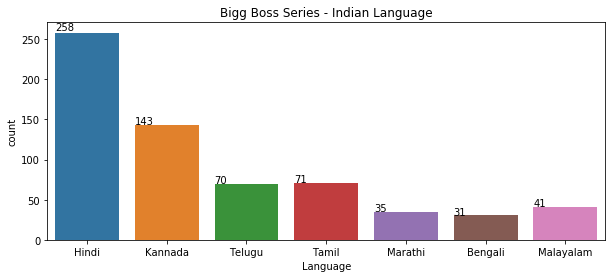

In [117]:
# Total number of Bigg Boss housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## In Bigg Boss India seasons, most of the housemates entered in first day/week

No     539
Yes    110
Name: Wild Card, dtype: int64 

No     83.0
Yes    17.0
Name: Wild Card, dtype: float64


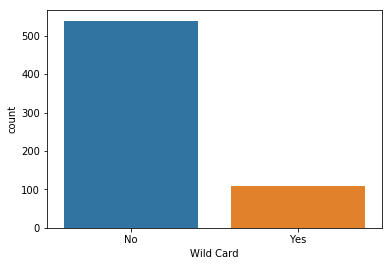

In [118]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100))
sns.countplot(x='Wild Card', data=bigg_boss)

In [119]:
# Common people has many professions, so clubbing them into one category
bigg_boss['Profession'] = bigg_boss['Profession'].fillna('UNKNOWN')
bigg_boss.loc[bigg_boss['Profession'].str.contains('Commoner'),'Profession']='Commoner'

## Number of film actress entered into the Bigg Boss houses, are more when compared to other professions 

Actress                  151
Actor                    107
Model                     49
Soap Actress              48
Commoner                  39
Singer                    38
Soap Actor                28
TV Anchor                 21
Reality Show Alumni       17
Comedian                  16
Radio Jockey              13
Social Media Star         13
News Presenter            13
Choreographer              8
Film Director              7
Sports Person              7
International Star         6
Producer                   5
Politician                 5
Controversial Fame         4
Video Jockey               4
Pageant Winner             4
Activist                   4
Swamiji                    4
LGBT                       4
Businessman                3
Wrestler                   3
Dancer                     2
Journalist                 2
Fashion Designer           2
Musician                   2
Stage Actress              2
Numerologist               1
Political Analyst          1
International 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

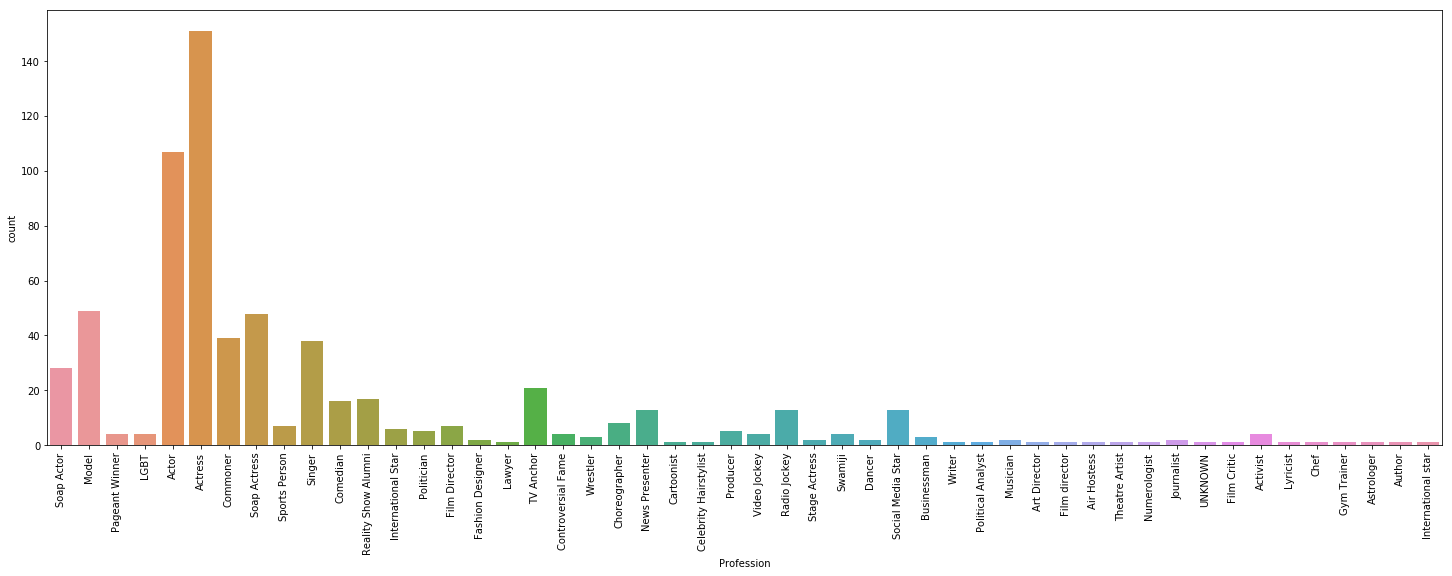

In [120]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(25,8))
sns.countplot(x='Profession', data=bigg_boss)
plt.xticks(rotation=90)

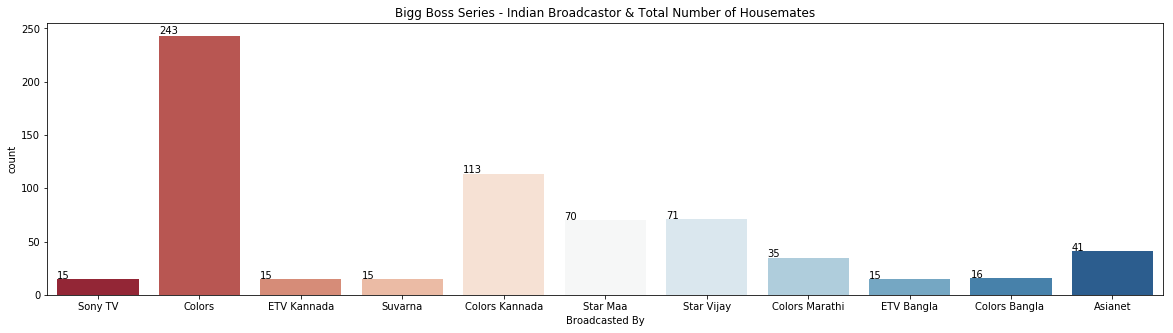

In [121]:
# Broadcastor
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu')
ax.set_title('Bigg Boss Series - Indian Broadcastor & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## Salman Khan hosted most number of seasons (in Bigg Boss Hindi), Sudeep is next in the list

In [122]:
bigg_boss.groupby('Host Name')['Season Number'].nunique().nlargest(25)

Host Name
Salman Khan            11
Sudeep                  8
Kamal Haasan            4
Mahesh Manjrekar        2
Mithun Chakraborthy     2
Mohanlal                2
Nagarjuna               2
Amitabh Bachchan        1
Arshad Warsi            1
Jr. NTR                 1
Nani                    1
Shilpa Shetty           1
Name: Season Number, dtype: int64

## In all Bigg Boss languages, and in all seasons, Female contestants are more

In [123]:
# Housemate's Gender
print(bigg_boss['Gender'].value_counts())


Female         339
Male           300
Transgender      4
Name: Gender, dtype: int64


### 4 Transgenders participated in all Indian languages

In [124]:
# Maximum TRP of Bigg Boss Hindi/India seasons
print("Maximum TRP",bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 15.6 

Language  Season Number
   Tamil              4


In [125]:
# Longest season of Bigg Boss Hindi/India seasons
print("Longest season",bigg_boss['Season Length'].max(), "days \n")
print(bigg_boss.loc[bigg_boss['Season Length']==bigg_boss['Season Length'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Longest season 143 days 

Language  Season Number
   Hindi             14


## https://satya-data.blogspot.com/2018/01/bigg-boss-data-set-bigg-boss.html

In [126]:
# All BB Winners
bigg_boss.loc[bigg_boss.Winner==1]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
8,Hindi,1,Rahul Roy,Actor,Male,03-Nov-06,NaN,NaN,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,"1,00,00,000",Sony TV,2.72,4.0,0.0,0.0,NaN,1.0,1.0
16,Hindi,2,Ashutosh Kaushik,Reality Show Alumni,Male,17-Aug-08,NaN,NaN,No,98,15,17-Aug-08,22-Nov-08,Shilpa Shetty,NaN,"1,00,00,000",Colors,2.89,4.0,0.0,0.0,NaN,1.0,1.0
42,Hindi,3,Vindu Dara Singh,Actor,Male,04-Oct-09,NaN,NaN,No,84,15,04-Oct-09,26-Dec-09,Amitabh Bachchan,NaN,"1,00,00,000",Colors,2.83,7.0,0.0,0.0,NaN,1.0,1.0
57,Hindi,4,Shweta Tiwari,Soap Actress,Female,03-Oct-10,NaN,NaN,No,96,16,03-Oct-10,08-Jan-11,Salman Khan,NaN,"1,00,00,000",Colors,4.95,4.0,0.0,2.0,NaN,1.0,1.0
62,Hindi,5,Juhi Parmar,Soap Actress,Female,02-Oct-11,NaN,NaN,No,98,18,02-Oct-11,07-Jan-12,Salman Khan,Sanjay Dutt,"1,00,00,000",Colors,4.19,4.0,0.0,1.0,NaN,1.0,1.0
92,Hindi,6,Urvashi Dholakia,Soap Actress,Female,07-Oct-12,NaN,NaN,No,97,19,07-Oct-12,12-Jan-13,Salman Khan,NaN,"50,00,000",Colors,3.81,6.0,0.0,1.0,NaN,1.0,1.0
102,Hindi,7,Gauhar Khan,Actress,Female,15-Sep-13,NaN,NaN,No,105,20,15-Sep-13,28-Dec-13,Salman Khan,NaN,"50,00,000",Colors,4.40,7.0,0.0,2.0,NaN,1.0,1.0
121,Hindi,8,Gautam Gulati,Actor,Male,21-Sep-14,NaN,NaN,No,105,19,21-Sep-14,03-Jan-15,Salman Khan,Farah Khan,"50,00,000",Colors,3.77,10.0,0.0,1.0,NaN,1.0,1.0
144,Hindi,9,Prince Narula,Reality Show Alumni,Male,11-Oct-15,NaN,NaN,No,105,20,11-Oct-15,23-Jan-16,Salman Khan,NaN,"50,00,000",Colors,2.90,6.0,0.0,4.0,NaN,1.0,1.0
165,Hindi,10,Manveer Gurjar,Commoner,Male,16-Oct-16,NaN,NaN,No,105,18,16-Oct-16,28-Jan-17,Salman Khan,NaN,"50,00,000",Colors,3.54,7.0,0.0,4.0,8.0,1.0,1.0


In [127]:
# Profession of BB Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actor                  9
Soap Actress           5
Actress                5
Singer                 4
Reality Show Alumni    3
TV Anchor              2
Commoner               2
Soap Actor             2
Film Director          1
Model                  1
Name: Profession, dtype: int64

In [128]:
# Gender of Season title Winners
bigg_boss.loc[bigg_boss.Winner==1,'Gender'].value_counts()

# Male      24
# Female    10

Male      24
Female    10
Name: Gender, dtype: int64

## No wild card entry housemate won the Bigg Boss competition.

In [129]:
# Entry type of the Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Wild Card'].value_counts()

No    34
Name: Wild Card, dtype: int64

In [130]:
# No re-entered contestant won Bigg Boss title
bigg_boss.loc[bigg_boss.Winner==1,'Number of re-entries'].value_counts()

0.0    33
Name: Number of re-entries, dtype: int64

In [131]:
# Number of eliminations or evictions faced by the Bigg Boss competition winners
bigg_boss.loc[bigg_boss.Winner==1,'Number of Evictions Faced'].value_counts().sort_index()

# Number of eliminations faced - Number of Winners

4.0     7
5.0     3
6.0     5
7.0     6
8.0     1
9.0     4
10.0    1
11.0    2
12.0    3
17.0    1
Name: Number of Evictions Faced, dtype: int64

In [132]:
# Bigg Boss winners Number of times elected as Captain
bigg_boss.loc[bigg_boss.Winner==1,'Number of times elected as Captain'].value_counts().sort_index()

# Number of times elected as Captain   - Number of winners

0.0     9
1.0     9
2.0    11
3.0     1
4.0     2
Name: Number of times elected as Captain, dtype: int64

## BB Kannada Seasons

In [133]:
lang='Kannada'

# All Bigg Boss Kannada Participants
bigg_boss.loc[(bigg_boss['Language']==lang)]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
258,Kannada,1,Anushree,TV Anchor,Female,24-Mar-13,NaN,11.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,NaN,0,ETV Kannada,4.7,3.0,0.0,NaN,NaN,0.0,0.0
259,Kannada,1,Aparna,TV Anchor,Female,24-Mar-13,NaN,6.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,NaN,0,ETV Kannada,4.7,1.0,0.0,NaN,NaN,0.0,0.0
260,Kannada,1,Arun Sagar,Art Director,Male,24-Mar-13,30-Jun-13,14.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,NaN,0,ETV Kannada,4.7,5.0,0.0,NaN,NaN,1.0,0.0
261,Kannada,1,Chandrika,Actress,Female,24-Mar-13,NaN,13.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,NaN,0,ETV Kannada,4.7,8.0,1.0,NaN,NaN,0.0,0.0
262,Kannada,1,Jayalakshmi,Controversial Fame,Female,24-Mar-13,NaN,7.0,No,98,15,24-Mar-13,30-Jun-13,Sudeep,NaN,0,ETV Kannada,4.7,3.0,1.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Kannada,8,Shamanth Gowda,Social Media Star,NaN,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,Kannada,8,Shankar Ashwath,Actor,Male,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,Kannada,8,Shubha Poonja,Actress,Female,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,Kannada,8,Vaishnavi Gowda,Soap Actress,Female,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# Bigg Boss Kannada Winners
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner']==1), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
269,Kannada,1,Vijay Raghavendra,Actor,Male,24-Mar-13,NaN,NaN,No,98,15,24-Mar-13,30-Jun-13,Sudeep,NaN,"50,00,000",ETV Kannada,4.7,6.0,0.0,NaN,NaN,1.0,1.0
274,Kannada,2,Akul Balaji,TV Anchor,Male,29-Jun-14,NaN,NaN,No,98,15,29-Jun-14,5-Oct-14,Sudeep,NaN,"50,00,000",Suvarna,NaN,4.0,0.0,2.0,NaN,1.0,1.0
301,Kannada,3,Shruti,Actress,Female,25-Oct-15,NaN,NaN,No,98,18,25-Oct-15,31-Jan-16,Sudeep,NaN,"50,00,000",Colors Kannada,NaN,6.0,0.0,3.0,NaN,1.0,1.0
315,Kannada,4,Pratham,Film Director,Male,09-Oct-16,NaN,NaN,No,112,18,09-Oct-16,29-Jan-17,Sudeep,NaN,"50,00,000",Colors Kannada,NaN,NaN,NaN,NaN,NaN,1.0,1.0
326,Kannada,5,Chandan Shetty,Singer,Male,15-Oct-17,NaN,NaN,No,106,20,15-Oct-17,28-Jan-18,Sudeep,NaN,"50,00,000",Colors Kannada,NaN,5.0,0.0,1.0,9.0,1.0,1.0
359,Kannada,6,Shashi Kumar,Commoner,Male,21-Oct-18,NaN,NaN,No,100,20,21-Oct-18,27-Jan-19,Sudeep,NaN,"50,00,000",Colors Kannada,NaN,9.0,0.0,1.0,8.0,1.0,1.0
379,Kannada,7,Shine Shetty,Actor,Male,13-Oct-19,NaN,NaN,No,113,20,13-Oct-19,02-Feb-20,Sudeep,NaN,"50,00,000",Colors Kannada,NaN,8.0,0.0,2.0,9.0,1.0,1.0


In [135]:
# Bigg Boss Kannada current season participants
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Season Number']==8), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
384,Kannada,8,Chandrakala Mohan,Soap Actress,Female,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,Kannada,8,Dhanushree,Social Media Star,NaN,28-Feb-21,07-Mar-21,1.0,No,105,17,28-Feb-21,NaN,Sudeep,NaN,0,Colors Kannada,NaN,1.0,0.0,0.0,NaN,0.0,0.0
386,Kannada,8,Divya Suresh,Actress,Female,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,Kannada,8,Divya Uruduga Rajeev,Actress,Female,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,Kannada,8,Geetha Bharathi Bhat,Soap Actress,Female,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,Kannada,8,KP Aravind,UNKNOWN,NaN,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,Kannada,8,Manju Pavagada,Comedian,NaN,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,1.0,NaN,NaN,NaN,NaN,NaN
391,Kannada,8,Nidhi Subbaiah,Actress,Female,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,1.0,NaN,NaN,NaN,NaN,NaN
392,Kannada,8,Nirmala Chennappa,Actress,Female,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,1.0,NaN,NaN,NaN,NaN,NaN
393,Kannada,8,Prashanth Sambargi,Businessman,Male,28-Feb-21,NaN,NaN,No,105,17,28-Feb-21,NaN,Sudeep,NaN,NaN,Colors Kannada,NaN,1.0,NaN,NaN,NaN,NaN,NaN


## Preparing Data for ML modelling

In [136]:
# Handling NULL values
bigg_boss.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  6
Entry Date                             99
Elimination Date                      516
Elimination Week Number               116
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                        17
Host Name                               0
Guest Host Name                       576
Prize Money (INR)                      16
Broadcasted By                          0
Average TRP                           255
Number of Evictions Faced              30
Number of re-entries                   34
Number of times elected as Captain     48
Social Media Popularity               563
Finalist                               16
Winner                            

In [137]:
# Removing records where Name field is empty
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [138]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)

# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)

# Filling blank values in 'Average TRP' column with average
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())

In [139]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [140]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,2006-11-03,NaT,10.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0,0.0
1,Hindi,1,Anupama Verma,Model,Female,2006-11-03,NaT,5.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,2006-11-03,NaT,4.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,2006-11-03,NaT,1.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
4,Hindi,1,Carol Gracias,Model,Female,2006-11-03,2007-01-26,12.0,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0,Sony TV,2.72,6.0,0.0,0.0,NaN,1.0,0.0


In [141]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
644,Malayalam,2,Jazla Madassery,Activist,Female,2020-01-26,NaT,8.0,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,0,Asianet,11.03,4.0,0.0,0.0,NaN,0.0,0.0
645,Malayalam,2,Pavan Gino Thomas,Model,Male,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,0,Asianet,11.03,0.0,0.0,0.0,NaN,0.0,0.0
646,Malayalam,2,Sooraj,Radio Jockey,Male,NaT,NaT,8.0,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,0,Asianet,11.03,2.0,0.0,0.0,NaN,0.0,0.0
647,Malayalam,2,Abhirami Suresh,Actress,Female,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,0,Asianet,11.03,3.0,0.0,0.0,NaN,0.0,0.0
648,Malayalam,2,Amrutha Suresh,Singer,Female,NaT,NaT,NaN,Yes,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,0,Asianet,11.03,3.0,0.0,0.0,NaN,0.0,0.0


In [142]:
# Updating last week-end elimination/entries manually
#bigg_boss.iloc[342,20] = 0

In [143]:
train = bigg_boss.loc[(bigg_boss['Winner'].notnull()), :]
train.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
531,Tamil,4,Rekha,Actress,Female,2020-10-04,2020-10-18,2.0,No,105,18,2020-10-04,2021-01-17,Kamal Haasan,NaN,0,Star Vijay,15.600000,1.0,0.0,0.0,NaN,0.0,0.0
228,Hindi,13,Tehseen Poonawalla,Political Analyst,Male,NaT,NaT,6.0,Yes,140,22,2019-09-29,2020-02-15,Salman Khan,NaN,0,Colors,9.060000,1.0,0.0,0.0,NaN,0.0,0.0
109,Hindi,7,Sangram Singh,Wrestler,Male,2013-09-15,2013-12-28,15.0,No,105,20,2013-09-15,2013-12-28,Salman Khan,NaN,0,Colors,4.400000,6.0,0.0,2.0,NaN,1.0,0.0
147,Hindi,9,Roopal Tyagi,Soap Actress,Female,2015-10-11,NaT,2.0,No,105,20,2015-10-11,2016-01-23,Salman Khan,NaN,0,Colors,2.900000,3.0,0.0,0.0,NaN,0.0,0.0
138,Hindi,9,Ankit Gera,Soap Actor,Male,2015-10-11,NaT,1.0,No,105,20,2015-10-11,2016-01-23,Salman Khan,NaN,0,Colors,2.900000,1.0,0.0,0.0,NaN,0.0,0.0
131,Hindi,8,Sushant Divgikar,Model,Male,2014-09-21,NaT,7.0,No,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,0,Colors,3.770000,2.0,0.0,0.0,NaN,0.0,0.0
314,Kannada,4,Niranjan Deshpande,Radio Jockey,Male,2016-10-09,NaT,NaN,No,112,18,2016-10-09,2017-01-29,Sudeep,NaN,0,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,0.0,0.0
627,Malayalam,2,Alina Padikkal,Soap Actress,Female,2020-01-05,NaT,NaN,No,105,23,2020-01-05,2020-04-19,Mohanlal,NaN,0,Asianet,11.030000,3.0,1.0,0.0,NaN,0.0,0.0
349,Kannada,6,Dhanraj CM,Commoner,Male,2018-10-21,NaT,13.0,No,100,20,2018-10-21,2019-01-27,Sudeep,NaN,0,Colors Kannada,6.230635,6.0,0.0,1.0,NaN,0.0,0.0
146,Hindi,9,Rochelle Rao,Pageant Winner,Female,2015-10-11,2016-01-23,15.0,No,105,20,2015-10-11,2016-01-23,Salman Khan,NaN,0,Colors,2.900000,8.0,0.0,0.0,NaN,1.0,0.0


In [144]:
test = bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner'].isnull()), :]
test

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
384,Kannada,8,Chandrakala Mohan,Soap Actress,Female,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN
386,Kannada,8,Divya Suresh,Actress,Female,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN
387,Kannada,8,Divya Uruduga Rajeev,Actress,Female,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN
388,Kannada,8,Geetha Bharathi Bhat,Soap Actress,Female,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN
389,Kannada,8,KP Aravind,UNKNOWN,NaN,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN
390,Kannada,8,Manju Pavagada,Comedian,NaN,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN
391,Kannada,8,Nidhi Subbaiah,Actress,Female,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN
392,Kannada,8,Nirmala Chennappa,Actress,Female,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN
393,Kannada,8,Prashanth Sambargi,Businessman,Male,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN
394,Kannada,8,Raghu Gowda,Social Media Star,NaN,2021-02-28,NaT,NaN,No,105,17,2021-02-28,NaT,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN,NaN


In [145]:
BB_Kannada_participants = test[['Name']]
BB_Kannada_participants.reset_index(drop=True, inplace=True)
BB_Kannada_participants

,Name
0,Chandrakala Mohan
1,Divya Suresh
2,Divya Uruduga Rajeev
3,Geetha Bharathi Bhat
4,KP Aravind
5,Manju Pavagada
6,Nidhi Subbaiah
7,Nirmala Chennappa
8,Prashanth Sambargi
9,Raghu Gowda


In [146]:
train.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number"], axis=1, inplace=True)
test.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Elimination Week Number","Winner"], axis=1, inplace=True)

In [147]:
train.head()

,Language,Season Number,Profession,Gender,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
0,Hindi,1,Soap Actor,Male,No,86,15,Arshad Warsi,NaN,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0,0.0
1,Hindi,1,Model,Female,No,86,15,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
2,Hindi,1,Pageant Winner,Male,No,86,15,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
3,Hindi,1,LGBT,Transgender,No,86,15,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
4,Hindi,1,Model,Female,No,86,15,Arshad Warsi,NaN,0,Sony TV,2.72,6.0,0.0,0.0,NaN,1.0,0.0


In [148]:
test.head(17)

,Language,Season Number,Profession,Gender,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist
384,Kannada,8,Soap Actress,Female,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN
386,Kannada,8,Actress,Female,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN
387,Kannada,8,Actress,Female,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN
388,Kannada,8,Soap Actress,Female,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN
389,Kannada,8,UNKNOWN,NaN,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN
390,Kannada,8,Comedian,NaN,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN
391,Kannada,8,Actress,Female,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN
392,Kannada,8,Actress,Female,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN
393,Kannada,8,Businessman,Male,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN
394,Kannada,8,Social Media Star,NaN,No,105,17,Sudeep,NaN,NaN,Colors Kannada,6.230635,1.0,0.0,NaN,NaN,NaN


In [149]:
# Spread of target variable
print(train['Winner'].value_counts(normalize=True)*100)

0.0    94.628752
1.0     5.371248
Name: Winner, dtype: float64


In [150]:
# One Hot Encoding

target = train.pop('Winner')
data = pd.concat([train, test])
dummies = pd.get_dummies(data, columns=data.columns, drop_first=True, sparse=True)
train2 = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

In [151]:
print(train2.shape)
print(test.shape)

(633, 175)
(16, 175)


In [152]:
train2.isnull().sum().sort_values(ascending=False)

Finalist_1.0                      0
Profession_Reality Show Alumni    0
Profession_TV Anchor              0
Profession_Swamiji                0
Profession_Stage Actress          0
                                 ..
Broadcasted By_Colors Bangla      0
Broadcasted By_Colors             0
Prize Money (INR)_50,00,000       0
Prize Money (INR)_5,00,000        0
Language_Hindi                    0
Length: 175, dtype: int64

In [153]:
train2.drop(["Profession_Musician","Profession_UNKNOWN"], axis=1, inplace=True)
test.drop(["Profession_Musician","Profession_UNKNOWN"], axis=1, inplace=True)

In [154]:
train2.head()

,Language_Hindi,Language_Kannada,Language_Malayalam,Language_Marathi,Language_Tamil,Language_Telugu,Season Number_2,Season Number_3,Season Number_4,Season Number_5,Season Number_6,Season Number_7,Season Number_8,Season Number_9,Season Number_10,Season Number_11,Season Number_12,Season Number_13,Season Number_14,Profession_Actor,Profession_Actress,Profession_Air Hostess,Profession_Art Director,Profession_Astrologer,Profession_Author,...,Number of Evictions Faced_7.0,Number of Evictions Faced_8.0,Number of Evictions Faced_9.0,Number of Evictions Faced_10.0,Number of Evictions Faced_11.0,Number of Evictions Faced_12.0,Number of Evictions Faced_13.0,Number of Evictions Faced_14.0,Number of Evictions Faced_17.0,Number of re-entries_1.0,Number of re-entries_2.0,Number of re-entries_3.0,Number of times elected as Captain_1.0,Number of times elected as Captain_2.0,Number of times elected as Captain_3.0,Number of times elected as Captain_4.0,Number of times elected as Captain_5.0,Social Media Popularity_4.0,Social Media Popularity_5.0,Social Media Popularity_6.0,Social Media Popularity_7.0,Social Media Popularity_8.0,Social Media Popularity_9.0,Social Media Popularity_10.0,Finalist_1.0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [155]:
target.values

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [156]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2021)
print(x_train.shape, x_val.shape)

(443, 173) (190, 173)


In [157]:
x_train.isnull().sum().sort_values(ascending=False)

Finalist_1.0                      0
Profession_Reality Show Alumni    0
Profession_TV Anchor              0
Profession_Swamiji                0
Profession_Stage Actress          0
                                 ..
Broadcasted By_Colors Kannada     0
Broadcasted By_Colors Bangla      0
Broadcasted By_Colors             0
Prize Money (INR)_50,00,000       0
Language_Hindi                    0
Length: 173, dtype: int64

## Machine Learning Modelling

In [158]:
def plot_confusion_matrix():
    cm = confusion_matrix(y_val, y_predicted_val).T
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label',size=12)
    ax.set_ylabel('Predicted Label',size=12)

In [159]:
# Logistic Regression
for c in [5, 10, 15, 20, 50, 100]:
    lr = LogisticRegression(random_state=2021, C=c).fit(x_train, y_train)
    print ("F1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(x_val), average='weighted')*100))

F1 score for C=5: 99.43679574270797
F1 score for C=10: 99.43679574270797
F1 score for C=15: 99.43679574270797
F1 score for C=20: 99.43679574270797
F1 score for C=50: 99.43679574270797
F1 score for C=100: 99.43679574270797


In [160]:
logi = LogisticRegression(random_state=2021,C=20).fit(x_train, y_train)
logi

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2021, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
predicted_val_logi = logi.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_logi > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 99.43679574270797
Accuracy Score - 99.47368421052632


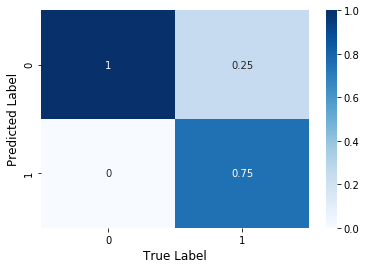

In [162]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [163]:
predicted_val_logi = logi.predict_proba(test)[:, 1]
winner_lg = pd.concat([BB_Kannada_participants, pd.DataFrame(predicted_val_logi, columns=['Predicted_Winner'])],axis=1)
winner_lg.sort_values('Predicted_Winner',ascending=False)

,Name,Predicted_Winner
0,Chandrakala Mohan,0.000828
3,Geetha Bharathi Bhat,0.000828
14,Vaishnavi Gowda,0.000828
4,KP Aravind,0.000362
9,Raghu Gowda,0.000337
11,Shamanth Gowda,0.000337
8,Prashanth Sambargi,0.000320
10,Rajeev Hanu,0.000305
5,Manju Pavagada,0.000264
12,Shankar Ashwath,0.000256


## Predicted Winner for Bigg Boss Kannada Season 8, as per Logistic Regression

In [164]:
# Predicted Winner for Bigg Boss Kannada Season 8, as per LogisticRegression
winner_lg.iloc[np.argwhere(winner_lg.Predicted_Winner == np.amax(winner_lg.Predicted_Winner)).flatten().tolist()]

,Name,Predicted_Winner
0,Chandrakala Mohan,0.000828
3,Geetha Bharathi Bhat,0.000828
14,Vaishnavi Gowda,0.000828


In [165]:
# RandomForest
rf = RandomForestClassifier(n_estimators=500, random_state=2021).fit(x_train, y_train)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=2021,
                       verbose=0, warm_start=False)

In [166]:
predicted_val_rf = rf.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_rf > 0.3).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 99.43679574270797
Accuracy Score - 99.47368421052632


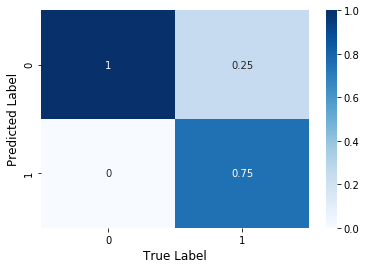

In [167]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 1

In [168]:
predicted_val_rf = rf.predict_proba(test)[:,1]
winner_rf = pd.concat([BB_Kannada_participants, pd.DataFrame(predicted_val_rf, columns=['Predicted_Winner'])],axis=1)
winner_rf.sort_values('Predicted_Winner',ascending=False)

,Name,Predicted_Winner
10,Rajeev Hanu,0.012
12,Shankar Ashwath,0.004
15,Vishwanath Haveri,0.004
0,Chandrakala Mohan,0.000
1,Divya Suresh,0.000
2,Divya Uruduga Rajeev,0.000
3,Geetha Bharathi Bhat,0.000
4,KP Aravind,0.000
5,Manju Pavagada,0.000
6,Nidhi Subbaiah,0.000


## Predicted Winner for Bigg Boss Kannada Season 8, as per Random Forest

In [169]:
# Predicted Winner for Bigg Boss Kannada Season 8, as per RandomForest
winner_rf.iloc[np.argwhere(winner_rf.Predicted_Winner == np.amax(winner_rf.Predicted_Winner)).flatten().tolist()]

,Name,Predicted_Winner
10,Rajeev Hanu,0.012


## Neaural Networks (MLP)

In [170]:
NN = MLPClassifier(random_state=2021)
#NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(500, 20), random_state=2021)
NN.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2021, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [171]:
predicted_val_nn = NN.predict_proba(x_val)[:,1]
y_predicted_val = (predicted_val_nn > 0.05).astype("int").ravel()
print('F1 Score -',f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -',accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 96.65721681252312
Accuracy Score - 95.78947368421052


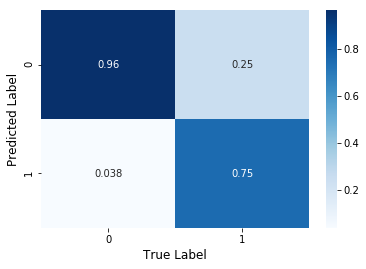

In [172]:
# Confusion Matrix
plot_confusion_matrix()

In [173]:
predicted_val_nn = NN.predict(test)
winner_nn = pd.concat([BB_Kannada_participants, pd.DataFrame(predicted_val_nn, columns=['Predicted_Winner'])],axis=1)
winner_nn.sort_values('Predicted_Winner',ascending=False)

,Name,Predicted_Winner
0,Chandrakala Mohan,0.0
1,Divya Suresh,0.0
2,Divya Uruduga Rajeev,0.0
3,Geetha Bharathi Bhat,0.0
4,KP Aravind,0.0
5,Manju Pavagada,0.0
6,Nidhi Subbaiah,0.0
7,Nirmala Chennappa,0.0
8,Prashanth Sambargi,0.0
9,Raghu Gowda,0.0


In [174]:
# Predicted Winner for Bigg Boss Kannada Season 8, as per Neaural Networks (Multi Layer Perceptron)
# winner_nn.iloc[winner_nn.Predicted_Winner.argmax()]['Name']

## Machine Learning Models to predict Indian Bigg Boss season Winners

## Telugu Bigg Boss Season4
## https://www.kaggle.com/thirumani/predicting-bigg-boss-telugu-season-4-winner

## Hindi Bigg Boss Season14
## https://www.kaggle.com/thirumani/predicting-bigg-boss-hindi-season-14-winner

## Malayalam Bigg Boss Season2
## https://www.kaggle.com/thirumani/predicting-bigg-boss-malayalam-season-2-winner

## Tamil Bigg Boss Season4
## https://www.kaggle.com/thirumani/predicting-bigg-boss-tamil-season-4-winner